In [1]:
#Imports packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Reading CSV files
google_apps = pd.read_csv("source/Google_Apps_Clean.csv")
google_app_reviews= pd.read_csv("source/googleplaystore_user_reviews.csv")
apple_apps= pd.read_csv("source/Apple_Apps_Clean.csv")

In [3]:
#Barry start 

In [4]:
#Barry end

In [5]:
# Sam start

# Found the count for each column in the Google dataframe to look for missing values using the count function.
google_apps.count()

App                10841
Category           10841
Rating              9367
Reviews            10841
Size in KB         10841
Installs           10841
Type               10840
Price              10841
Content Rating     10841
Genres             10840
Last Updated       10841
Current Version    10833
Android Ver        10839
dtype: int64

In [6]:
# Dropped any null rows using the dropna function.
google_apps = google_apps.dropna(how='any')
google_apps.count()

App                9360
Category           9360
Rating             9360
Reviews            9360
Size in KB         9360
Installs           9360
Type               9360
Price              9360
Content Rating     9360
Genres             9360
Last Updated       9360
Current Version    9360
Android Ver        9360
dtype: int64

In [7]:
# Found the count for each column in the Apple dataframe to look for missing values using the count function.
apple_apps.count()

App                     7197
Category               11100
Rating                 11100
Reviews                11100
Size in KB             11100
Price                  11100
Content Rating         11100
Current Version         7197
Number of Languages    11100
dtype: int64

In [8]:
# Dropped any null rows using the dropna function.
apple_apps = apple_apps.dropna(how='any')
apple_apps.count()

App                    7197
Category               7197
Rating                 7197
Reviews                7197
Size in KB             7197
Price                  7197
Content Rating         7197
Current Version        7197
Number of Languages    7197
dtype: int64

In [9]:
# Renamed the Rating column to Google Rating with the rename column function.
google_apps = google_apps.rename(columns={"Rating": "Google Rating"})

# Renamed the Rating column to Apple Rating with the rename column function.
apple_apps = apple_apps.rename(columns={"Rating": "Apple Rating"})

In [10]:
# Used GroupBy function in order to separate the data into fields according to "Category" values.
google_apps_category = google_apps.groupby("Category")

# Got the average of the Rating column in the GroupBy object using the mean function.
google_apps_mean = google_apps_category[["Google Rating"]].mean()
google_apps_mean

,Google Rating
Category,
Art & Design,4.377049
Auto & Vehicles,4.190411
Beauty,4.278571
Books & Reference,4.346067
Business,4.121452
Comics,4.155172
Communication,4.158537
Dating,3.970769
Education,4.389032


In [11]:
# Used GroupBy function in order to separate the data into fields according to "Category" values.
apple_apps_category = apple_apps.groupby("Category")

# Got the average of the Rating column in the GroupBy object using the mean function.
apple_apps_mean = apple_apps_category[["Apple Rating"]].mean()
apple_apps_mean

,Apple Rating
Category,
Books & Reference,2.832386
Business,3.745614
Catalogs,2.100000
Education,3.376380
Entertainment,3.246729
Finance,2.432692
Food & Drink,3.182540
Game,3.685008
Health & Fitness,3.700000


In [12]:
# Merged both dataframes together based on the Categories they share by using the merge function.
google_apple_merge = pd.merge(google_apps_mean, apple_apps_mean, on="Category")
google_apple_merge

,Google Rating,Apple Rating
Category,,
Books & Reference,4.346067,2.832386
Business,4.121452,3.745614
Education,4.389032,3.376380
Entertainment,4.126174,3.246729
Finance,4.131889,2.432692
Food & Drink,4.166972,3.182540
Game,4.286326,3.685008
Health & Fitness,4.277104,3.700000
Lifestyle,4.094904,2.805556


In [13]:
# Renamed the Rating columns to Average Google and Average Apple Rating with the rename column function.
google_apple_merge = google_apple_merge.rename(columns={"Google Rating": "Average Google Rating", "Apple Rating": "Average Apple Rating"})

# Reset the index so that the index is now based on the different Categories.
google_apple_merge = google_apple_merge.reset_index()


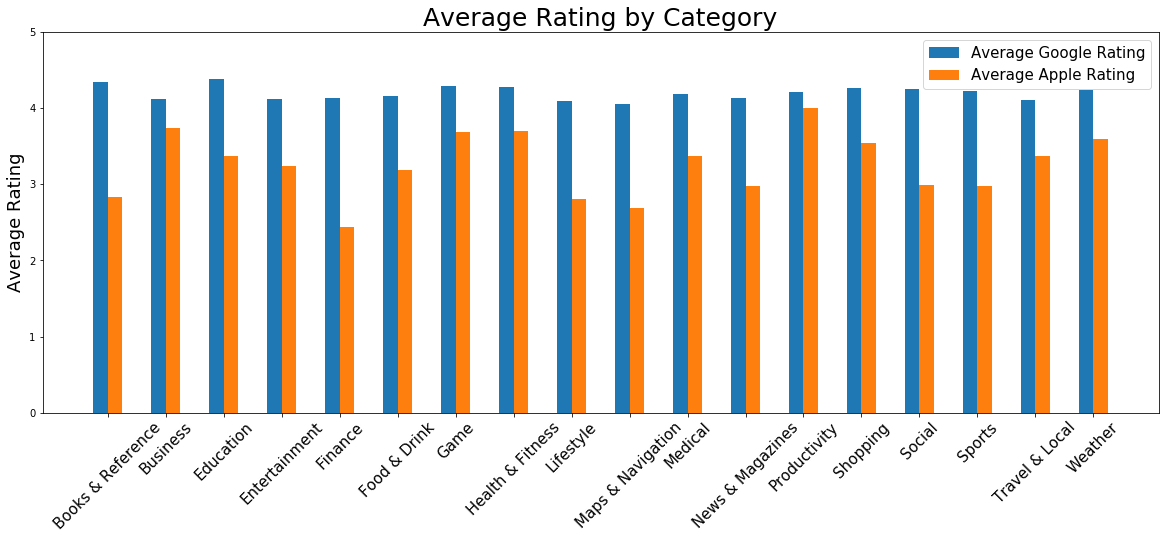

In [14]:

# Created a bar chart from the google_apple_merge dataframe comparing the average ratings of the app categories.
# Title will be 'Average Rating by Category'
# x-axis labels will be the different categories and the y-axis will be 'Average Rating'
ind = np.arange(len(google_apple_merge['Average Google Rating']))
width = 0.25

fig, ax = plt.subplots(figsize=(20, 7))
rects1 = ax.bar(ind - width/2, google_apple_merge['Average Google Rating'], width, label='Google')
rects2 = ax.bar(ind + width/2, google_apple_merge['Average Apple Rating'], width, label='Apple')


plt.ylim(0, 5)

ax.set_ylabel('Average Rating', fontsize=18)
ax.set_title('Average Rating by Category', fontsize=25)
ax.set_xticks(ind)
ax.set_xticklabels(google_apple_merge['Category'], rotation=45, fontsize=15)
plt.legend(['Average Google Rating', 'Average Apple Rating'], loc='upper right', fontsize=15)
plt.savefig("Images/avg_rting_sk_bgraph.png")



In [15]:
# Found the average rating for all of the Google apps using the mean function.
google_pop = google_apps['Google Rating']
google_pop.mean()

4.191837606837612

In [16]:
# Found the average rating for all of the Apple apps using the mean function.
apple_pop = apple_apps['Apple Rating']
apple_pop.mean()

3.526955675976101

In [17]:
# Null Hypothesis: There is no difference in ratings between the common app categories included in the Google and Apple dataframes.

# Calculated the Independent (Two Sample) T-Test
stats.ttest_ind(google_pop, apple_pop, equal_var=False)

# The pvalue is less than .05 which tells us that the Null Hypothesis will be rejected and there is a significant difference.

#Sam end

Ttest_indResult(statistic=35.6147498872777, pvalue=5.0879096654718844e-259)

In [18]:
#Abbas start

In [19]:
google_apps.count()
google_apps= google_apps.dropna(how='any')
google_apps.count()

apple_apps.count()
apple_apps = apple_apps.dropna(how='any')
apple_apps.count()

App                    7197
Category               7197
Apple Rating           7197
Reviews                7197
Size in KB             7197
Price                  7197
Content Rating         7197
Current Version        7197
Number of Languages    7197
dtype: int64

In [20]:
# Data Frame - Top 5 paid google categories by spending
# Select only the paid apps

google_apps_paid = google_apps.loc[google_apps['Type']=="Paid",:]

# Convert the value
google_apps_paid.loc[:,'Price']=google_apps_paid['Price'].str.replace('$','')
google_apps_paid= google_apps_paid.astype({'Price': float})

google_apps_grouped = google_apps_paid.groupby('Category').agg(
                 total_games=('App', 'count'),
                 total_spending = ('Price', 'sum'))

google_apps_paid_top_5 = google_apps_grouped.sort_values('total_spending', ascending=False)
google_apps_paid_top_5 = google_apps_paid_top_5.reset_index()
google_apps_paid_top_5 = google_apps_paid_top_5.iloc[0:5]
google_apps_paid_top_5

//anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Category,total_games,total_spending
0,Finance,13,2439.87
1,Family,161,2295.75
2,Lifestyle,18,1960.88
3,Medical,88,1043.14
4,Game,77,280.36


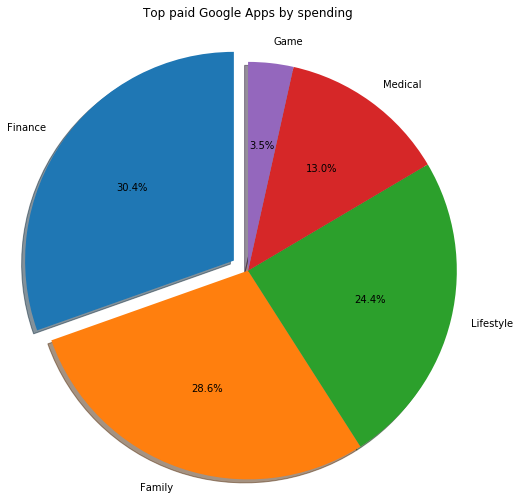

<Figure size 432x288 with 0 Axes>

In [21]:
# plot a pie chart

labels = google_apps_paid_top_5['Category']
sizes =  google_apps_paid_top_5['total_spending']
explode = (0.1,0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 1.2)
plt.title('Top paid Google Apps by spending\n\n')
plt.show()
plt.savefig('images/as_google_total_spending.png')

In [22]:
# Data Frame - Top 5 paid apple categories by spending
# Select only the paid apps

apple_apps_paid = apple_apps.loc[apple_apps['Price'] >0.00,:]

# Convert the value

apple_apps_paid= apple_apps_paid.astype({'Price': float})


apple_apps_grouped = apple_apps_paid.groupby('Category').agg(
                 total_games=('App', 'count'),
                 total_spending = ('Price', 'sum'))
                
apple_apps_paid_top_5 = apple_apps_grouped.sort_values('total_spending', ascending=False)
apple_apps_paid_top_5 = apple_apps_paid_top_5.reset_index()
apple_apps_paid_top_5
apple_apps_paid_top_5 = apple_apps_paid_top_5.iloc[0:5]
apple_apps_paid_top_5

,Category,total_games,total_spending
0,Game,1605,5533.95
1,Education,321,1824.79
2,Productivity,116,770.84
3,Music,71,667.29
4,Photo & Video,182,514.18


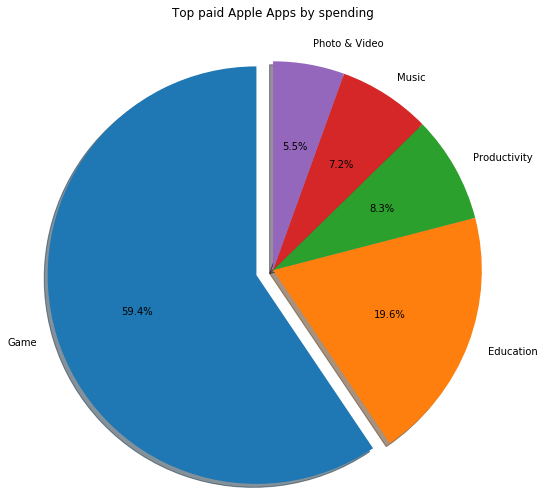

<Figure size 432x288 with 0 Axes>

In [23]:
# plot a pie chart

labels = apple_apps_paid_top_5['Category']
sizes =  apple_apps_paid_top_5['total_spending']
explode = (0.1,0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 1.2)
plt.title('Top paid Apple Apps by spending\n\n')
plt.show()
plt.savefig('images/as_apple_total_spending.png')

In [24]:
#Abbas end

In [25]:
#Farshad start

In [27]:
# Data Frame - Top 5 google categories by ratings
google_apps_df1 = google_apps.groupby('Category').agg(
                 total_games=('App', 'count'),
                 highest_rating = ('Google Rating', 'max'),
                 lowest_rating = ('Google Rating', 'min'),
                 sd = ('Google Rating', 'std'))

google_apps_top_5 = google_apps_df1.sort_values('total_games', ascending=False)
google_apps_top_5 = google_apps_top_5.reset_index()
google_apps_top_5 = google_apps_top_5.iloc[0:5]
google_apps_top_5


,Category,total_games,highest_rating,lowest_rating,sd
0,Family,1746,5.0,1.0,0.508151
1,Game,1097,5.0,1.0,0.365375
2,Tools,733,5.0,1.0,0.616538
3,Productivity,351,5.0,1.0,0.504931
4,Medical,350,5.0,1.0,0.663581


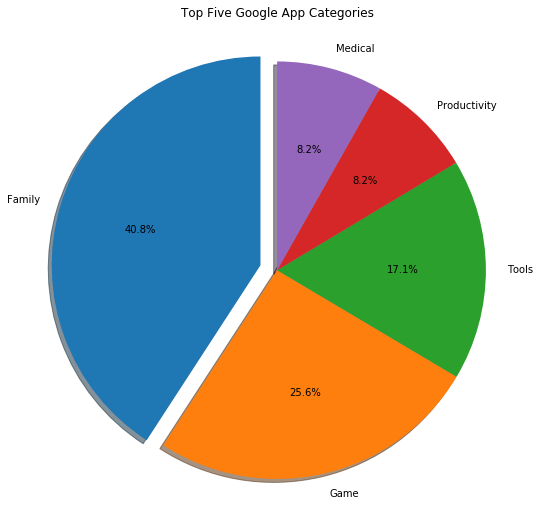

<Figure size 432x288 with 0 Axes>

In [28]:
# Pie Chart - Top 5 google category by total games
labels = google_apps_top_5['Category']
sizes =  google_apps_top_5['total_games']
explode = (0.1,0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 1.2)
plt.title("Top Five Google App Categories\n\n")
plt.show()
plt.savefig('images/fe_google_top_rating.png')

In [30]:
# Data Frame - Top 5 apple categories by total games
apple_apps_df1 = apple_apps.groupby('Category').agg(
                  total_games= ('App', 'count'),
                  highest_rating = ('Apple Rating', 'max'),
                  lowest_rating = ('Apple Rating', 'min'),
                  sd = ('Apple Rating', 'std'))


apple_apps_top_5 = apple_apps_df1.sort_values('total_games', ascending=False)
apple_apps_top_5 = apple_apps_top_5.reset_index()
apple_apps_top_5 = apple_apps_top_5.iloc[0:5]
apple_apps_top_5


,Category,total_games,highest_rating,lowest_rating,sd
0,Game,3862,5.0,0.0,1.468178
1,Entertainment,535,5.0,0.0,1.437481
2,Education,453,5.0,0.0,1.543311
3,Photo & Video,349,5.0,0.0,1.278592
4,Utilities,248,5.0,0.0,1.473521


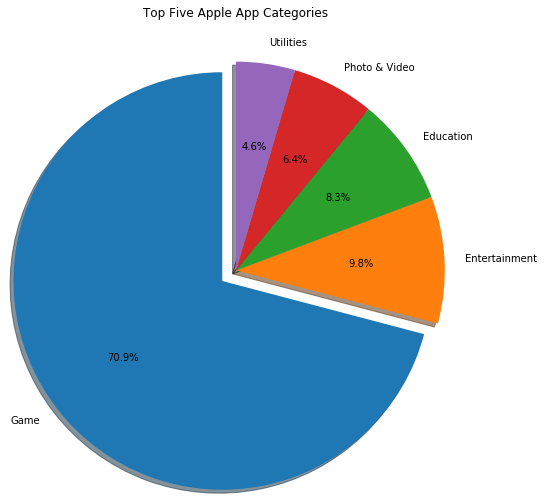

<Figure size 432x288 with 0 Axes>

In [31]:
# Pie Chart - Top 5 apple category by total games
labels = apple_apps_top_5['Category']
sizes =  apple_apps_top_5['total_games']
explode = (0.1,0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 1.2)
plt.title("Top Five Apple App Categories\n\n")
plt.show()
plt.savefig('images/fe_apple_top_rating.png')

In [32]:
# Unpaid apps in google and apple
google_apps_unpaid = google_apps.loc[google_apps['Type']=='Free',:]

apple_apps_unpaid = apple_apps.loc[apple_apps['Price']==0,:]


In [34]:
import scipy.stats as stats
# Null Hypothesis: There is no difference in ratings between paid and unpaid apple apps
stats.ttest_ind(apple_apps_unpaid["Apple Rating"], apple_apps_paid["Apple Rating"], equal_var=False)


Ttest_indResult(statistic=-9.876988547855325, pvalue=7.320722332762754e-23)

In [36]:
# Null Hypothesis: There is no difference in ratings between paid google and apple apps
stats.ttest_ind(google_apps_paid.dropna()["Google Rating"], apple_apps_paid.dropna()["Apple Rating"], equal_var=False)

Ttest_indResult(statistic=17.145911722953855, pvalue=3.2184408556026873e-62)

In [37]:
# Null Hypothesis: There is no difference in ratings between paid and unpaid google apps
stats.ttest_ind(google_apps_unpaid.dropna()["Google Rating"], google_apps_paid.dropna()["Google Rating"], equal_var=False)

Ttest_indResult(statistic=-3.6156105754780063, pvalue=0.00032025304094651625)

In [38]:
# Binning the apps by price ranges

bins = [0.00, 1.99, 3.99, 9.99, 499.99]
group_names = ['<$2','$2-4','$5-10','>$10']
google_apps_paid['Price Range'] = pd.cut(google_apps_paid['Price'], bins, labels=group_names)
google_apps_paid
apple_apps_paid['Price Range'] = pd.cut(apple_apps_paid['Price'], bins, labels=group_names)

google_apps_paid_ranges = google_apps_paid.groupby("Price Range").agg(
                         total_games= ('App', 'count' ))
google_apps_paid_ranges
apple_apps_paid_ranges = apple_apps_paid.groupby("Price Range").agg(
                           total_games = ('App', 'count'))

combined_paid_range = pd.merge(apple_apps_paid_ranges, google_apps_paid_ranges, how="inner", on="Price Range")
combined_paid_range = combined_paid_range.reset_index()
combined_paid_range

,Price Range,total_games_x,total_games_y
0,<$2,1349,207
1,$2-4,960,214
2,$5-10,735,151
3,>$10,97,73


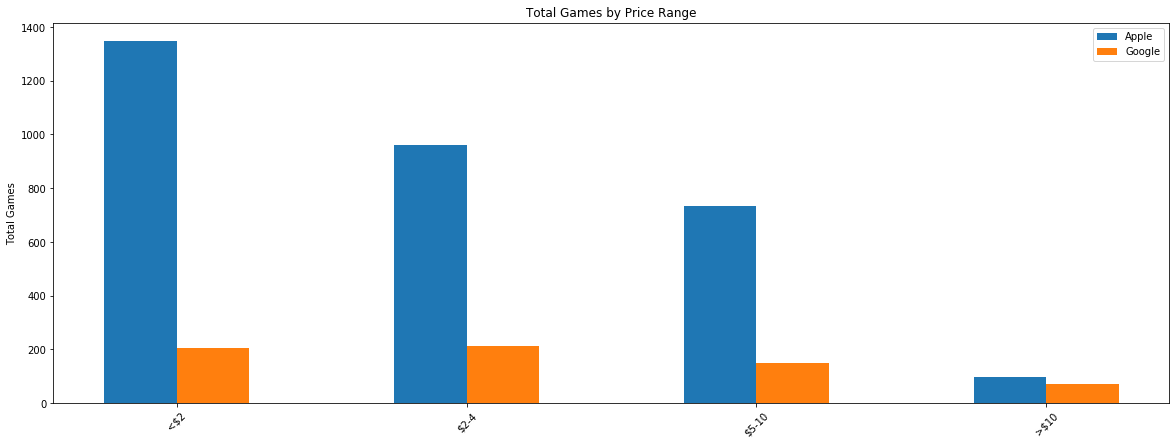

<Figure size 432x288 with 0 Axes>

In [39]:
# Plot Bar Chart
ind = np.arange(len(combined_paid_range['total_games_x']))
width = 0.25

fig, ax = plt.subplots(figsize=(20, 7))
rects1 = ax.bar(ind - width/2, combined_paid_range['total_games_x'], width, label='Apple games')
rects2 = ax.bar(ind + width/2, combined_paid_range['total_games_y'], width, label='Google games')

ax.set_ylabel('Total Games')
ax.set_title('Total Games by Price Range')
ax.set_xticks(ind)
ax.set_xticklabels(combined_paid_range['Price Range'], rotation=45)
plt.legend(['Apple', 'Google'], loc='upper right')
plt.show()
plt.savefig('images/fe_spending_ranges.png')

In [40]:
#Farshad end